# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 

z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

Za pomocą funkcji [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) przy wykorzystaniu dwóch metod **RK45** i **RK23** rozwiąż poniższe przykady:

***Zadanie 1.*** 

Rozwiąż równanie $\dot{x}(t)=\frac{x+t}{x-t}$, $x(0)=1$ (równanie to posiada rozwiązanie dokładne $x(t)=t+\sqrt{1+2t^2}$). Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.

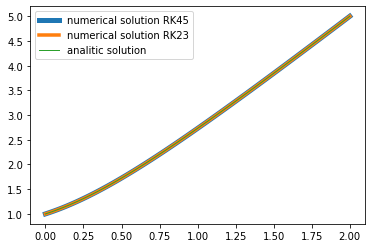

In [22]:
from scipy.integrate import solve_ivp
from numpy import linspace
from matplotlib import pyplot as plt
def f1(t,y):
    return (y + t) / (y - t)
def sol_f1(t):
    return t + (1 + 2 * t**2) ** (1 / 2)
t_eval=linspace(0,2,100)
sol = solve_ivp(f1,(0,2),y0=[1],t_eval=t_eval,method="RK45")
sol2 = solve_ivp(f1,(0,2),y0=[1],t_eval=t_eval,method="RK23")
plt.plot(sol.t,sol.y[0],linewidth=5)
plt.plot(sol2.t,sol2.y[0],linewidth=3.5)
plt.plot(t_eval,[sol_f1(t) for t in t_eval],linewidth=1)
plt.legend(["numerical solution RK45",'numerical solution RK23','analitic solution'])
plt.show()

***Zadanie 2.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

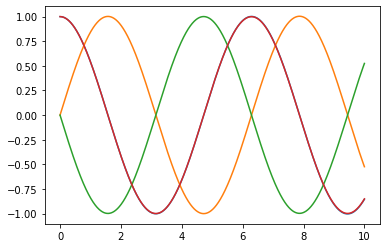

In [27]:
from numpy import array
def f2(t,y):
    x1,x2,x3,x4 = y
    dx1 = x3
    dx2 = x4
    dx3 = -x1/(x1**2 + x2**2)**(3/2)
    dx4 = -x2/(x1**2 + x2**2)**(3/2)
    return dx1, dx2, dx3, dx4
end = 10
t_eval=linspace(0,end,100000)
sol3 = solve_ivp(f2,(0,end),y0=[1,0,0,1],t_eval=t_eval,method="RK23")
plt.plot(sol3.t,sol3.y[0])
plt.plot(sol3.t,sol3.y[1])
plt.plot(sol3.t,sol3.y[2])
plt.plot(sol3.t,sol3.y[3])
plt.show()
# Dokładniejsze wyniki w tym wypadku daje metoda rk23

***Zadanie 3.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

In [24]:
end = 10
t_eval=linspace(0,end,10000)
def f3(t,y):
    return array([[-667, 333],[666, -334]])@y
sol = solve_ivp(f3,[0,end],[1,2],method="RK23",t_eval=t_eval)
plt.show()

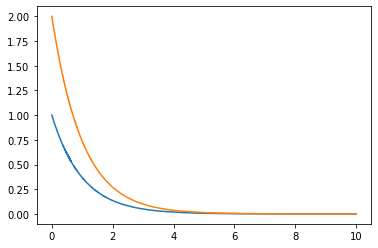

In [25]:
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])

***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1+\mu'}{D_2}\\
\dot{x_3}(t)x_4(t)\\
\dot{x_4}(t)=x_3-2x_2-\mu'\frac{x_3}{D_1}
-\mu\frac{x_3}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1+\mu)^2+{x_3}^2)^\frac{3}{2}\\
D_2=((x_1-\mu')^2+{x_3}^2)^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

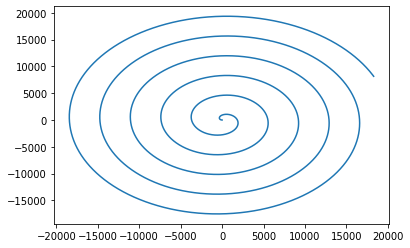

In [26]:
u = 0.012277471
u2 = 1 - 0.012277471

def f4(t, y):
    x1,x2,x3,x4 = y
    D1 = ((x1+u)**2 + x3**2)**(3/2)
    D2 = ((x1-u2)**2 + x3**2)**(3/2)
    dx1 = x2
    dx2 = x1 + 2* x4 + u2 * (x1 + u)/D1 - u*(x1+u2)/D2
    dx3 = x4
    dx4 = x3-2*x2-u2*x3/D1-u*x3/D2
    return dx1,dx2,dx3,dx4
T=17.0652165601579625588917206249
t_eval=linspace(0,2 * T,10000000)

sol = solve_ivp(f4,[0,2 * T],[0.994,0,0,-2.00158510637908252240537862224],method="RK45",t_eval=t_eval)
plt.plot(sol.y[0],sol.y[2])
plt.show()
# plt.plot(sol.y[1],sol.y[3])

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
